# Supervised Learning in Python

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Classification

### Fitting a supervised Learning algo on iris data

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
Score on test data 
0.9666666666666667
Overfitting and Underfitting Visualization


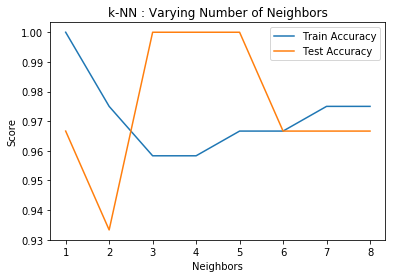

At 3,4 & 5 we get a score of 1, we should use either of these neighbors


In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

data=pd.read_csv("iris.csv")
print(data.head())

y=data['species'].values
X=data.drop('species',axis=1).values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
print("Score on test data ")
print(knn.score(X_test,y_test))

# Fitting the model to check best model number of k neighbors which fit the data 
neighbors=np.arange(1,9)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy[i]=knn.score(X_train,y_train)
    test_accuracy[i]=knn.score(X_test,y_test)

print("Overfitting and Underfitting Visualization")    
plt.title('k-NN : Varying Number of Neighbors')
plt.plot(neighbors,train_accuracy,label='Train Accuracy')
plt.plot(neighbors,test_accuracy,label='Test Accuracy')
plt.legend()
plt.xlabel('Neighbors')
plt.ylabel('Score')
plt.show()

print("At 3,4 & 5 we get a score of 1, we should use either of these neighbors")

### Fitting Supervised algo on MNIST dataset

(1797, 8, 8)
(1797, 64)


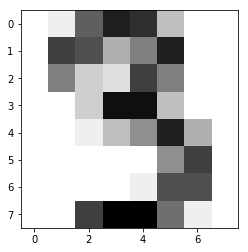

Scoe on test data is 
0.9833333333333333
Overfitting and Underfitting Visualization


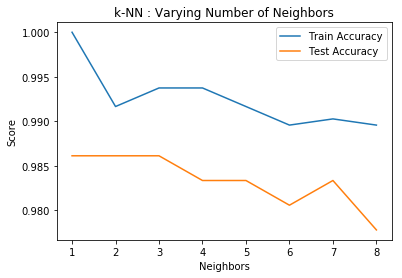

Having k(no. of neighbors) of 2 will give the maximum score


In [87]:
from sklearn import datasets
import matplotlib.pyplot as plt

digits=datasets.load_digits()
#print(digits.images)
#print(digits.keys())
#print(digits.DESCR)


# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1110
plt.imshow(digits.images[1110], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show() 

X=digits.data
y=digits.target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
print("Scoe on test data is ")
print(knn.score(X_test,y_test))

# Fitting the model to check best model number of k neighbors which fit the data 
neighbors=np.arange(1,9)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy[i]=knn.score(X_train,y_train)
    test_accuracy[i]=knn.score(X_test,y_test)

    
print("Overfitting and Underfitting Visualization")
plt.title('k-NN : Varying Number of Neighbors')
plt.plot(neighbors,train_accuracy,label='Train Accuracy')
plt.plot(neighbors,test_accuracy,label='Test Accuracy')
plt.legend()
plt.xlabel('Neighbors')
plt.ylabel('Score')
plt.show()

print("Having k(no. of neighbors) of 2 will give the maximum score")

# Regression
We are making use of the GapMinder which has data of life expectancy data and variables which influence it 

   population  fertility  HIV        CO2  BMI_male      GDP  BMI_female  life  \
0  34811059.0       2.73  0.1   3.328945  24.59620  12314.0    129.9049  75.3   
1  19842251.0       6.43  2.0   1.474353  22.25083   7103.0    130.1247  58.3   
2  40381860.0       2.24  0.5   4.785170  27.50170  14646.0    118.8915  75.5   
3   2975029.0       1.40  0.1   1.804106  25.35542   7383.0    132.8108  72.5   
4  21370348.0       1.96  0.1  18.016313  27.56373  41312.0    117.3755  81.5   

   child_mortality                      Region  
0             29.5  Middle East & North Africa  
1            192.0          Sub-Saharan Africa  
2             15.4                     America  
3             20.0       Europe & Central Asia  
4              5.2         East Asia & Pacific  
['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP', 'BMI_female', 'life', 'child_mortality', 'Region']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
po

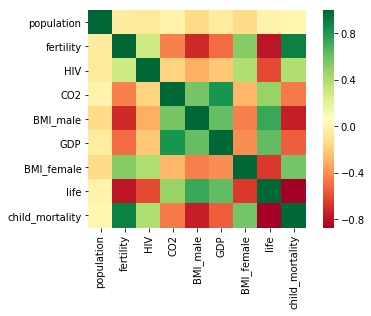

In [88]:
data=pd.read_csv("gapminder.csv")
print(data.head(5))
print(list(data))
print(data.info())

import seaborn as sns

sns.heatmap(data.corr(), square=True, cmap='RdYlGn')
print(data.corr())

0.6192442167740035


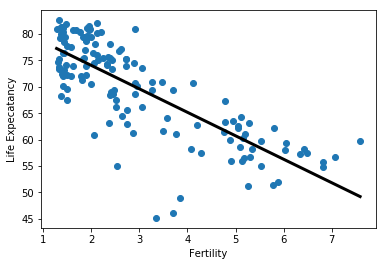

The higher the R^2 the better the data can be explained by the model
R^2: 0.8095708266351931

Mean Square error: 3.566382636451457


In [89]:
y=data['life'].values
X=data['fertility'].values

y=y.reshape(-1,1)
X=X.reshape(-1,1)

from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(X,y)
prediction_space=np.linspace(min(X),max(X)).reshape(-1,1)

y_pred=reg.predict(prediction_space)

print(reg.score(X,y))
plt.scatter(X,y)
plt.xlabel('Fertility')
plt.ylabel('Life Expecatancy')
# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()


# Calculating Mean Squared Error and R square error

from sklearn.metrics import mean_squared_error

reg2=LinearRegression()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
reg2.fit(X_train,y_train)
y_pred=reg2.predict(X_test)

print("The higher the R^2 the better the data can be explained by the model")
print("R^2: {}".format(reg2.score(X_test,y_test)))
print()
print("Mean Square error: {}".format(np.sqrt(mean_squared_error(y_test,y_pred))))

In [90]:
# Now lets make use of all the features till now we are just making use of the Fertility 

target=['life']
features=['population','fertility','HIV','CO2','BMI_male','GDP','BMI_female','child_mortality']

X=data[features].values
y=data[target].values.reshape(-1,1)

reg2=LinearRegression()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
reg2.fit(X_train,y_train)
y_pred=reg2.predict(X_test)

print("As you can see by using more faetures we have increased the performance of our model: ")
print("The higher the R^2 the better the data can be explained by the model")
print("R^2: {}".format(reg2.score(X_test,y_test)))
print()
print("Mean Square error: {}".format(np.sqrt(mean_squared_error(y_test,y_pred))))


As you can see by using more faetures we have increased the performance of our model: 
The higher the R^2 the better the data can be explained by the model
R^2: 0.9204607131172617

Mean Square error: 2.304899756840888


### Cross Validation

In [91]:
from sklearn.model_selection import cross_val_score
reg=LinearRegression()
cv_score=cross_val_score(reg,X,y,cv=5)
print(cv_score)

print("Average CV score is")
print(np.mean(cv_score))

[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
Average CV score is
0.8599627722793451


### Lasso Regression

[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]
It tells us that Child Mortality is the most important feature while predicting the life expectancy in each coutry


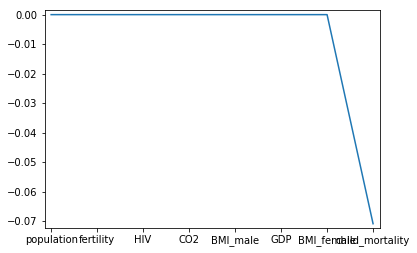

In [97]:
from sklearn.linear_model import Lasso

lasso=Lasso(alpha=0.4,normalize=True)
lasso.fit(X,y)
lasso_coef=lasso.coef_
print(lasso_coef)


print("It tells us that Child Mortality is the most important feature while predicting the life expectancy in each coutry")
# Plot the coefficients
plt.plot(features, lasso_coef)
plt.margins(0.02)
plt.show()

### Ridge Regression - Combining use of Cross validation and the optimum Alpha value

Our Mean Score Values descreses as we increase alpha values, an alpha value of 0.1 will give the best result. If we alpha is 0 the Reduction will be just OLS


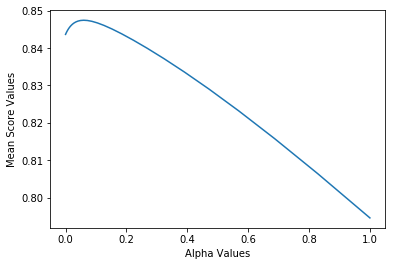

In [121]:
from sklearn.linear_model import Ridge

alpha_space = np.logspace(-4, 0, 50)
ridge_scores=[]
ridge_std=[]

ridge=Ridge(normalize=True)
for alpha in alpha_values:
    ridge.alpha=alpha
    ridge_cv_scores=cross_val_score(ridge,X,y,cv=10)
    ridge_scores.append(np.mean(ridge_cv_scores))
    ridge_std.append(np.std(ridge_cv_scores))
    
# Displaying the port
plt.plot(alpha_values,ridge_scores)
plt.xlabel("Alpha Values")
plt.ylabel("Mean Score Values")
print("Our Mean Score Values descreses as we increase alpha values, an alpha value of 0.1 will give the best result. If we alpha is 0 the Reduction will be just OLS")

[[-1.92355017e-09 -8.55300243e-01 -5.68995187e-01 -9.83842369e-02
   4.36478792e-01  1.03415174e-04 -2.90682391e-01 -6.87557102e-02]]


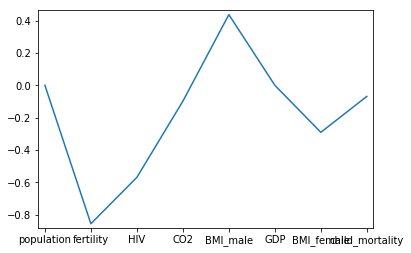

In [132]:
ridge=Ridge(alpha=0.1,normalize=True)
ridge.fit(X,y)
print(ridge.coef_)

ridgeCoeff=ridge.coef_[0]
plt.plot(features,ridgeCoeff)
plt.margins(0.02)
plt.show()

### Lets compare which one performs better Lasso or Ridge on our gapmind dataset

Performance on Test set for both Lasso and Ridge
0.9196924015132759
0.9149219972373899
Perform Cross Validation
Ridge outperforms Lasso Regression in most times


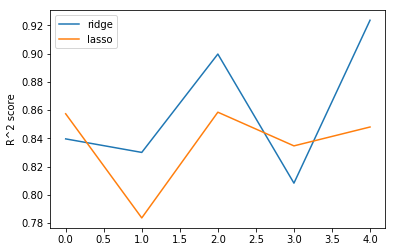

In [141]:
ridge=Ridge(alpha=0.1,normalize=True)
lasso=Lasso(alpha=0.1,normalize=True)

print('Performance on Test set for both Lasso and Ridge')
ridge.fit(X_train,y_train)
lasso.fit(X_train,y_train)

print(ridge.score(X_test,y_test))
print(lasso.score(X_test,y_test))

print("Perform Cross Validation")

ridge_cv_scores=cross_val_score(ridge,X,y,cv=5)
lasso_cv_scores=cross_val_score(lasso,X,y,cv=5)
    
plt.plot(ridge_cv_scores,label='ridge')
plt.plot(lasso_cv_scores,label='lasso')
plt.legend()
plt.ylabel("R^2 score")

print("Ridge outperforms Lasso Regression in most times")

# Fine tuning the model

1) Confusion Matrix<br>
2) Precision, Recall and F1 Score

In [184]:
df=pd.read_csv("diabetes.csv")
print(df.head(5))
print(list(df))
print(df.info())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                    

In [204]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Perform KNeighbors Classifier to classify if Outcome(diabestes) is 0 or 1
target=['Outcome']
features=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
y=df[target].values.ravel()
X=df[features].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

knn=KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       105
           1       0.56      0.63      0.60        49

   micro avg       0.73      0.73      0.73       154
   macro avg       0.69      0.70      0.70       154
weighted avg       0.74      0.73      0.73       154

[[81 24]
 [18 31]]


In [214]:
# Logistic Regression for same data
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)


print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

print("Logistic Regression is definitely better than KNeighborsClassifier")

from sklearn.metrics import roc_auc_score

y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test,y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg,X,y,cv=5,scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))


              precision    recall  f1-score   support

           0       0.84      0.80      0.82       104
           1       0.62      0.68      0.65        50

   micro avg       0.76      0.76      0.76       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.77      0.76      0.76       154

[[83 21]
 [16 34]]
Logistic Regression is definitely better than KNeighborsClassifier
AUC: 0.8192837465564738
AUC scores computed using 5-fold cross-validation: [0.7987037  0.80777778 0.81962963 0.86622642 0.85037736]


### Hypermater optmization using GridSearch CV

In [216]:
from sklearn.model_selection import GridSearchCV

c_space=np.logspace(-5,8,15)
param_grid={'C':c_space}

logreg=LogisticRegression()

logreg_cv=GridSearchCV(logreg,param_grid,cv=5)

logreg_cv.fit(X,y)

print('Logreg params: {}'.format(logreg_cv.best_params_))
print('Best score is {}'.format(logreg_cv.best_score_))

Logreg params: {'C': 268.2695795279727}
Best score is 0.7708333333333334


### Hyperparameter optimization using RandomSearchCV

In [218]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

param_dist={'max_depth':[3,None],'max_features':randint(1,9),'min_samples_leaf':randint(1,9),'criterion':['gini','entropy']}

tree=DecisionTreeClassifier()
tree_cv=RandomizedSearchCV(tree,param_dist,cv=5)

tree_cv.fit(X,y)
print('Decision Tree params: {}'.format(tree_cv.best_params_))
print('Best score is {}'.format(tree_cv.best_score_))

Decision Tree params: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 6}
Best score is 0.7473958333333334


### Full Classification on the diabetes dataset

In [224]:
logreg=LogisticRegression()
param_grid={'C':np.logspace(-5,8,15),'penalty':['l1','l2']}

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

logreg_cv=GridSearchCV(estimator=logreg,param_grid=param_grid,cv=5)

logreg_cv.fit(X_train,y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))


print("Tunedd Logistic Regression performance on test set: {}".format(logreg_cv.score(X_test,y_test)))

Tuned Logistic Regression Parameter: {'C': 3.727593720314938, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7687296416938111
Tunedd Logistic Regression performance on test set: 0.7532467532467533


### Ful Regression problem on gapminder dataset

In [228]:
from sklearn.linear_model import ElasticNet

target=['life']
features=['population','fertility','HIV','CO2','BMI_male','GDP','BMI_female','child_mortality']

X=data[features].values
y=data[target].values.reshape(-1,1)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio':l1_space}


elastic_net=ElasticNet()



# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(estimator=elastic_net,param_grid=param_grid , cv=5)

# Fit it to the training data
gm_cv.fit(X_train,y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_testt, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))


Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.9211905884629882
Tuned ElasticNet MSE: 5.26381328587236


# Preprocessing Data

In [230]:
# Using Gapminder dataset
data

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.10,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.00,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.50,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.10,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.10,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific
5,8331465.0,1.41,0.30,8.183160,26.46741,43952.0,124.1394,80.4,4.6,Europe & Central Asia
6,8868713.0,1.99,0.10,5.109538,25.65117,14365.0,128.6024,70.6,43.3,Europe & Central Asia
7,348587.0,1.89,3.10,3.131921,27.24594,24373.0,124.3862,72.2,14.5,America
8,148252473.0,2.38,0.06,0.319161,20.39742,2265.0,125.0307,68.4,55.9,South Asia
9,277315.0,1.83,1.30,6.008279,26.38439,16075.0,126.3940,75.3,15.4,America


Life Expectancy Box Plot in different counties


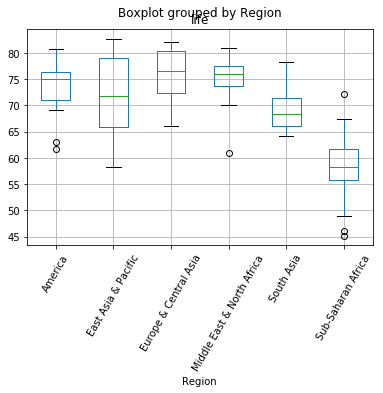

In [234]:
data.boxplot('life','Region',rot=60)
print('Life Expectancy Box Plot in different counties')
plt.show()

In [235]:
data=pd.get_dummies(data)
print(data.columns)

data=pd.get_dummies(data,drop_first=True)
print(data.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')
Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')


In [276]:
features=['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa']
X=data[features].values
y=data['']
from sklearn.linear_model import Ridge

ridge=Ridge(alpha=0.5,normalize=True)

ridge_cv=cross_val_score(ridge,X,y,cv=5)

print(np.mean(ridge_cv))

0.8318653650476566


## Missing Data 
### Removing the Missing Data 

In [277]:
print(df.head())
print("Insuline values can't be 0 in a human or the SkinThickness can't be 0. They are missing value because of miscalculation, erorrs or storing fault")

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72           35.0      NaN  33.6   
1            1       85             66           29.0      NaN  26.6   
2            8      183             64            NaN      NaN  23.3   
3            1       89             66           23.0     94.0  28.1   
4            0      137             40           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Insuline values can't be 0 in a human or the SkinThickness can't be 0. They are missing value because of miscalculation, erorrs or storing fault


In [316]:
df.Insulin.replace(0,np.nan,inplace=True)
df.SkinThickness.replace(0,np.nan,inplace=True)
df.BMI.replace(0,np.nan,inplace=True)

df.info()
print("Dropping the NA values will reduce the dataframe by half which we don't want")
print(df.dropna().shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               541 non-null float64
Insulin                     394 non-null float64
BMI                         757 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(4), int64(5)
memory usage: 54.1 KB
Dropping the NA values will reduce the dataframe by half which we don't want
(393, 9)


### Imputing Missing Values and Pipeline

In [349]:
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

df=pd.read_csv("diabetes.csv")

df.Insulin.replace(0,np.nan,inplace=True)
df.SkinThickness.replace(0,np.nan,inplace=True)
df.BMI.replace(0,np.nan,inplace=True)

target=['Outcome']
features=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
y=df[target].values.ravel()
X=df[features].values


imp=Imputer(missing_values='NaN',strategy='most_frequent',axis=0)
func=KNeighborsClassifier(n_neighbors=6)

steps=[('imputation',imp),('SVM',func)]


In [351]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
pipeline=Pipeline(steps)
pipeline.fit(X_train,y_train)
y_pred=pipeline.predict(X_test)# Compute metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78        99
           1       0.61      0.55      0.58        55

   micro avg       0.71      0.71      0.71       154
   macro avg       0.69      0.68      0.68       154
weighted avg       0.71      0.71      0.71       154



### Centre and Scaling on wine data

In [368]:
data=datasets.load_wine()
print("Features Dataset")
print(data.data)
print("Targets Dataset")
print(data.target)
print("Feature Names")
print(data.feature_names)

Features Dataset
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
Targets Dataset
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Feature Names
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_

In [371]:
from sklearn.preprocessing import scale
X=data.data
y=data.target
X_scaled=scale(X)

print("Scaled Data")
print(np.mean(X_scaled))
print(np.std(X_scaled))

print("UnScaled Data")
print(np.mean(X))
print(np.std(X))

print("We can see the data is scaled since STD is 1 and mean is not that high")

Scaled Data
4.66735072755122e-16
1.0
UnScaled Data
69.13366292091617
215.74620420485243
We can see the data is scaled since STD is 1 and mean is not that high


In [379]:
from sklearn.preprocessing import StandardScaler

steps = [('scaler',StandardScaler()),
        ('knn', KNeighborsClassifier())]

pipeline=Pipeline(steps)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

knn_scaled=pipeline.fit(X_train,y_train)
knn_unscaled=KNeighborsClassifier().fit(X_train,y_train)


print("Scaled performance: {}".format(knn_scaled.score(X_test,y_test)))
print("Unscaled performance: {}".format(knn_unscaled.score(X_test,y_test)))


print("Scaled Data outperforms the Unscaled data by such a huge margin")

Scaled performance: 0.9629629629629629
Unscaled performance: 0.7407407407407407
Scaled Data outperforms the Unscaled data by such a huge margin


In [380]:
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(estimator=pipeline,param_grid=parameters, cv=3)

# Fit to the training set
cv.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))


Accuracy: 0.9722222222222222
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.90      0.95        10
           2       0.92      1.00      0.96        11

   micro avg       0.97      0.97      0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36

Tuned Model Parameters: {'SVM__C': 1, 'SVM__gamma': 0.01}
